In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [49]:
dust_raw_data = glob.glob("C:/Users/aaaaa/Downloads/data/dust/*.csv")

dust_temp = []

for i in dust_raw_data: 
    df = pd.read_csv(i, encoding = "cp949")
    df.rename(columns = {"...1" : "gu"}, inplace = True)
    df.drop("Unnamed: 0", axis = 1, inplace = True)
    df.fillna(method = 'bfill', inplace = True)
    dust_temp.append(df)

In [50]:
print(len(dust_temp))

12


In [51]:
print(type(dust_temp))

<class 'list'>


In [53]:
dust_month = pd.concat(dust_temp, ignore_index = True)

In [54]:
print(type(dust_month))

<class 'pandas.core.frame.DataFrame'>


In [45]:
dust_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gu      312 non-null    object 
 1   X1      312 non-null    float64
 2   X2      312 non-null    float64
 3   X3      312 non-null    float64
 4   X4      312 non-null    float64
 5   X5      312 non-null    float64
 6   X6      312 non-null    float64
 7   X7      312 non-null    float64
 8   X8      312 non-null    float64
 9   X9      312 non-null    float64
 10  X10     312 non-null    float64
 11  X11     312 non-null    float64
 12  X12     312 non-null    float64
 13  X13     312 non-null    float64
 14  X14     312 non-null    int64  
 15  X15     312 non-null    float64
 16  X16     312 non-null    int64  
 17  X17     312 non-null    int64  
 18  X18     312 non-null    float64
 19  X19     312 non-null    int64  
 20  X20     312 non-null    float64
 21  X21     312 non-null    float64
 22  X2

In [46]:
dust_month.tail()

,gu,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
307,관악구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
308,서초구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
309,강남구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN
310,송파구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
311,강동구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN


In [47]:
dust_month.isnull().sum()

gu       0
X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
X14      0
X15      0
X16      0
X17      0
X18      0
X19      0
X20      0
X21      0
X22      0
X23      0
X24      0
X25      0
X26      0
X27      0
X28      0
X29     26
X30     26
X31    130
dtype: int64

In [ ]:
dust_month.fillna(self, value=None, method=None, axis=1, inplace=True)

In [55]:
dm = pd.melt(dust_month, id_vars = 'gu', var_name = 'day', value_name='ppm')

[Text(0, 0, '서울시 평균'),
 Text(0, 0, '종로구'),
 Text(0, 0, '중구'),
 Text(0, 0, '용산구'),
 Text(0, 0, '성동구'),
 Text(0, 0, '광진구'),
 Text(0, 0, '동대문구'),
 Text(0, 0, '중랑구'),
 Text(0, 0, '성북구'),
 Text(0, 0, '강북구'),
 Text(0, 0, '도봉구'),
 Text(0, 0, '노원구'),
 Text(0, 0, '은평구'),
 Text(0, 0, '서대문구'),
 Text(0, 0, '마포구'),
 Text(0, 0, '양천구'),
 Text(0, 0, '강서구'),
 Text(0, 0, '구로구'),
 Text(0, 0, '금천구'),
 Text(0, 0, '영등포구'),
 Text(0, 0, '동작구'),
 Text(0, 0, '관악구'),
 Text(0, 0, '서초구'),
 Text(0, 0, '강남구'),
 Text(0, 0, '송파구'),
 Text(0, 0, '강동구')]

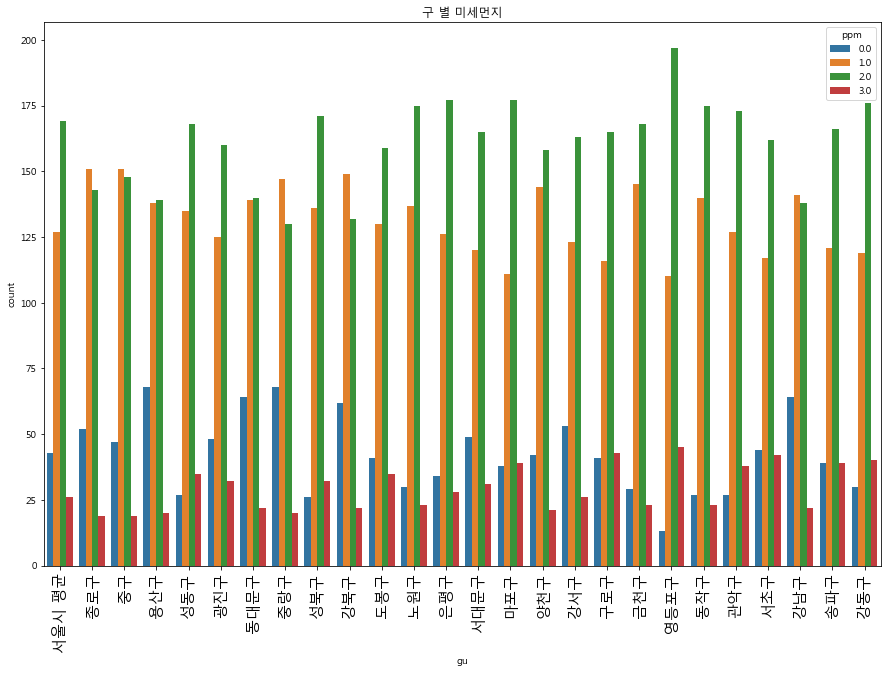

In [57]:
#tempdf

ax = plt.subplots(figsize = (15, 10))
ax = sns.countplot(x = 'gu',hue='ppm', data = dm)
ax.set_title('구 별 미세먼지')
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=90,
                   fontsize= 15
                 )

In [61]:
dm.head()

,gu,day,ppm
0,서울시 평균,X1,2.0
1,종로구,X1,1.0
2,중구,X1,1.0
3,용산구,X1,2.0
4,성동구,X1,2.0


In [62]:
def g_b(n):
    if n == 0:
        return "좋음"
    elif n == 1:
        return "보통"
    elif n == 2:
        return "나쁨"
    else:
        return "매우나쁨"

dm['good_bad'] = dm['ppm'].apply(g_b)
dm.head()

,gu,day,ppm,good_bad
0,서울시 평균,X1,2.0,나쁨
1,종로구,X1,1.0,보통
2,중구,X1,1.0,보통
3,용산구,X1,2.0,나쁨
4,성동구,X1,2.0,나쁨


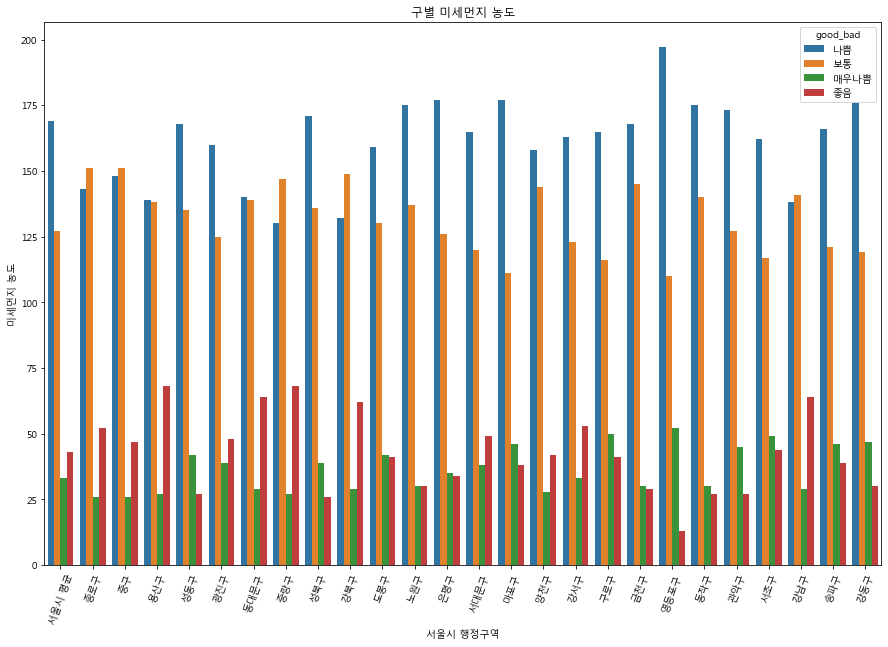

In [74]:
ax = plt.subplots(figsize = (15, 10))
ax = sns.countplot(data = dm, x = 'gu', hue = 'good_bad')
ax.set_title('구별 미세먼지 농도')
ax.set_xlabel('서울시 행정구역')
ax.set_ylabel('미세먼지 농도')
plt.xticks(rotation = 70)
plt.show()